In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [10]:
#step1
wine=load_wine()
x=wine.data
y=wine.target
feature_name=wine.feature_names


In [11]:
print(x.shape)

(178, 13)


In [13]:
#step2
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [16]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
print("varience ratio-",pca.explained_variance_ratio_)

varience ratio- [0.36198848 0.1920749 ]


In [17]:
pca_df=pd.DataFrame(x_pca,columns=['pc1','pc2'])
pca_df["Target"]=y

In [18]:
pca_df.head()

,pc1,pc2,Target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0


In [20]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     178 non-null    float64
 1   pc2     178 non-null    float64
 2   Target  178 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


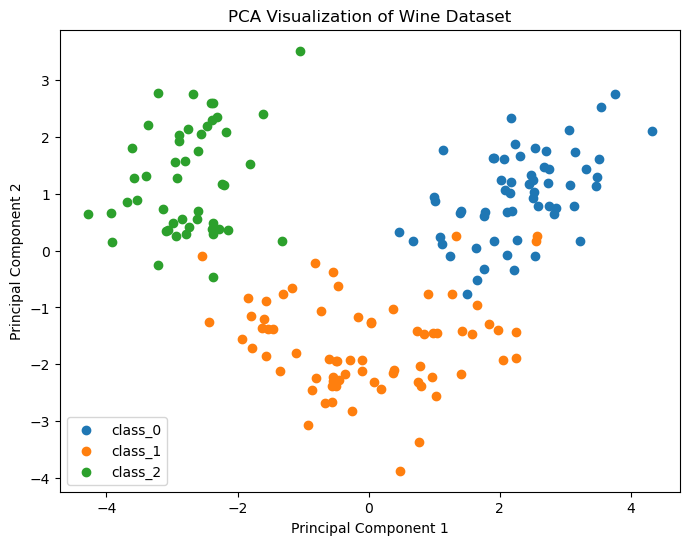

In [25]:
#step5=visualization
plt.figure(figsize=(8,6))
for target in set(y):
    subset=pca_df[pca_df["Target"]==target]
    plt.scatter(subset['pc1'],subset['pc2'],label=wine.target_names[target])
    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Wine Dataset")
plt.legend()
plt.show()   